# DATA 1 Formative Exam

Simos Gerasimou


### **Time Allowed:**
Twenty-Four (24) hours

### **Allocation of Marks:**
The exam consists of four (4) questions and each question is worth 25 marks.

### **Instructions:**
Candidates should answer all questions using Jupyter Notebooks running Python 3. Failing to do so will result in a mark of 0%. All questions are independent and can be answered in any order. Specific questions have strict limits on the length of your answers; text exceeding the limit will not be marked.

***

### **Question 1: Data Analysis (25 marks)**

YorkBus, as the name suggests, is a bus company operating in Noth Yorkshire. Given the increasing fuel prices and the uncertainty in income due to the CoronaVirus, the company is interested in analysing, among others, the expenses it would incur if all services continue running normally. To do this analysis, YorkBus asked DataVision to help. 

You should load the dataset named "yorkBus.csv" and answer the following data questions using Python 3, Pandas and Matplotlib.


**(i) [2 marks]** Which is the independent and which is the dependent variable?¶

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression


df = pd.read_csv('yorkBus.csv')
df.columns
# miles is independant cost is dependant

Index(['Period', 'Cost', 'Miles'], dtype='object')

**(ii) [4 marks]** Calculate the Pearson correlation coefficient. You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy or numpy method to check your result.

In [2]:
x = df.Miles
y = df.Cost
sum( (x - x.mean()) * (y - y.mean()) ) / math.sqrt( sum((x - x.mean())**2) * sum( (y - y.mean())**2 ))

0.9728495502470614

**(iii) [2 marks]**
What do you think of the correlation between these two variables? What do you expect the linear regression model to be?

extremely strong positive correlation between the two variables, I expect the linear regression to fit almost all the plots extremely closely

**(iv) [3 marks]**
Using Python and scikit-learn, train a simple linear regression model for this data

In [3]:
X = df.Miles.values.reshape(-1, 1)
y = df.Cost
reg = LinearRegression().fit(X, y)

**(v) [3 marks]**
Report the regression and intercept coefficients of this linear regression model. Report also the final form of the linear regression equation

In [4]:
print(f"Regression coeffiecent: {reg.coef_[0]}, Intercept: {reg.intercept_}")

Regression coeffiecent: 0.04467295857709487, Intercept: 6496.3277278758


**(vi) [4 marks]**
Calculate the goodness of fit  𝑅2 . You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate sklearn method to check your result.

In [5]:
f = lambda x: reg.coef_[0] * x + reg.intercept_
rss = sum( (y - f(x))**2 )
tss = sum( (y - y.mean())**2 )

1 - rss/tss

0.9464362474159097

**(vii) [5 marks]**
Plot a scatter plot and the linear regression model. Does the plot confirm the results obtained in the previous questions? 

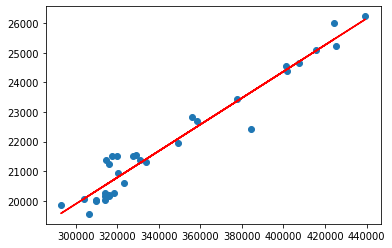

Yes the graph shows and extremely strong positive correleation, with only 1 outlier value


In [6]:
plt.scatter(x, y)
plt.plot(X, reg.predict(X), 'r')
plt.show()
print('Yes the graph shows and extremely strong positive correleation, with only 1 outlier value')

**(viii) [2 marks]**
Calculate the approximate cost of a bus that has travelled 375000 miles over a single period

In [7]:
reg.predict([[375000]])[0]

23248.687194286376

---

### **Question 2: Data Processing (25 marks)**

Netflix is a media-services provider and production company. The company's primary business is its subscription-based streaming service which offers online streaming of a library of films and television programs, including those produced in-house.

DataVision has been recruited to analyse the data about TV shows and movies available on Netflix.


You should use the dataset named "netflix.csv" and answer the following data questions using Python 3, Pandas and Matplotlib.

**(i) [2 marks]**
What is the shape of the dataset?

In [32]:
df = pd.read_csv('netflix.csv')
df.shape

(6234, 12)

**(ii) [3 marks]**
What does each column mean and which is its datatype?

- show_id: id of show in database (int64)
- type: whether the show is a movie or a tv show (object)
- title: shows title (object)
- director: name of show director (object)
- cast: main character cast in show (object)
- country: the country the show takes place in (object)
- date_added: the date the show was added to netflix (object)
- release_year: the year the show was released (int64)
- rating: show rating to advise the suitability of watching for different ages (object)
- duration: the length of the movie or seasons of TV show (object)
- listed_in: the catergories the show is in e.g comedy, children & family (object)
- description: description of show (object)

**(iii) [2 marks]**
Is there any missing data? Show the number of missing data per column.

In [9]:
df.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

**(iv) [3 marks]**
DataVision's policy is to remove any column of which more than 5% of the data is missing. Remove the appropriate columns. 

In [10]:
crit_val = df.shape[0] * 0.95
df = df.dropna(thresh=crit_val, axis=1)
df

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


**(v) [4 marks]**
For the remaining columns with missing data, apply the most appropriate imputation method to eliminate the missing data

In [11]:
#df.date_added = df.date_added.fillna(df.release_year) # cannot string format date
df.rating = df.rating.fillna('UR')

for i in np.flatnonzero(df.date_added.isna()):
    date = f"January 1, {df.iloc[i].release_year}"
    df.at[i, 'date_added'] = date

**(vi) [3 marks]** What is the ratio between the different types of content available on Netflix? Plot a bar chart to illustrate this.

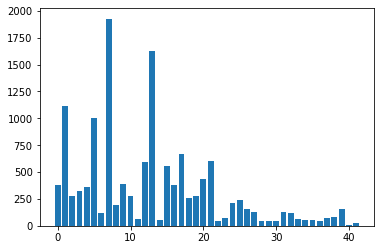

In [12]:
catergories = {}
for (_, listed) in df.listed_in.iteritems():
    for catergory in listed.split(', '):
        if catergory in catergories:
            catergories[catergory] += 1
        else:
            catergories[catergory] = 1

x_pos = [i for i, _ in enumerate(catergories)]
plt.bar(x_pos, catergories.values())
#plt.xticks(x_pos, catergories.keys()) # too many catergories to plot ticks?
plt.show()

**(vii) [4 marks]**
Plot a density graph that shows the distribution of content added per year. What do you infer from this plot?

<AxesSubplot:xlabel='date_added'>

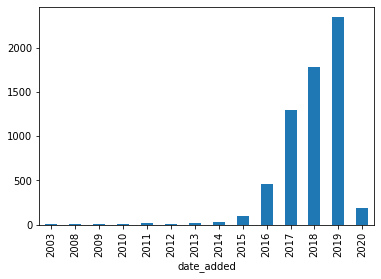

In [13]:
df.date_added = pd.to_datetime(df.date_added)
df.groupby(df.date_added.dt.year).size().plot(kind='bar')
# the rate of shows being added to netflix is growing continuously
# and 2020 dosen't have many values becuase the data was taken from the start
# of 2020

**(viii) [4 marks]**
Find the 10 oldest tv shows on Netflix.

In [33]:
df.sort_values(by='release_year').head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4292,81030762,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,"December 30, 2018",1925,TV-PG,1 Season,TV Shows,This collection restores films from women who ...
2011,60027945,Movie,Prelude to War,Frank Capra,NaN,United States,"March 31, 2017",1942,TV-PG,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
2013,60027942,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-G,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
2022,80119186,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
2023,70013050,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",NaN,United States,"March 31, 2017",1943,TV-14,82 min,Documentaries,This installment of Frank Capra's acclaimed do...
2026,70022548,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,NR,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...
2017,80119194,Movie,The Memphis Belle: A Story of a\nFlying Fortress,William Wyler,NaN,United States,"March 31, 2017",1944,TV-PG,40 min,"Classic Movies, Documentaries",This documentary centers on the crew of the B-...
2019,80119191,Movie,The Negro Soldier,Stuart Heisler,NaN,United States,"March 31, 2017",1944,TV-14,40 min,"Classic Movies, Documentaries",This documentary urged African Americans to en...
2021,80119189,Movie,Tunisian Victory,"Frank Capra, John Huston, Hugh Stewart, Roy Bo...",Burgess Meredith,"United States, United Kingdom","March 31, 2017",1944,TV-PG,76 min,"Classic Movies, Documentaries",British and American troops join forces to lib...
2012,80119188,Movie,San Pietro,John Huston,NaN,United States,"March 31, 2017",1945,TV-14,32 min,"Classic Movies, Documentaries","After the Allies invade Italy, the Liri Valley..."


---

### **Question 3: Inferential Analysis (25 marks)**

**Part A** 

York City Knights, York's professional rugby league club, wants to assess whether a new diet the team has been using helped rugby players to increase their muscle size. DataVision has collected data for 20 rugby players before and after using the diet.

You should use the dataset named "rugby.csv"and answer the following data questions using Python 3, Pandas and Matplotlib.


**(i) [3 marks]**
State the Null and Alternative hypotheses, reporting the variables that will be used for evaluating the hypotheses

H0: The new diet does not has no effect on the players muscle size  
H1: The new diet increases the players muscle size

**(ii) [2 marks]**
Calculate the degrees of freedom

In [34]:
df = pd.read_csv('rugby.csv')
df.shape[0] - 1

19

**(iii) [3 marks]**
Find the critical value for a two-tailed test with significance level α=0.05

**(iv) [4 marks]**
Perform the appropriate t test to evaluate the hypotheses for significance level 𝛼=0.05 . You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy method to check your results.

In [17]:
#Write your answer here


**Part B**

FoxWood Inc. makes Apple Pencils for iPad and is interested in increasing the strength of their product. It is thought that strength is a function of metal concentration in the core of the pencil. An investigation is carried out to compare four levels of metal concentration: 5%, 10%, 15% and 20%. For each concentration level, six samples are collected and are measured based on their strength.

You should use the dataset named "pencil.csv" and answer the following data questions using Python 3, Pandas and Matplotlib.

**(v) [5 marks]**
Plot a boxplot for the different levels of metal concentration

In [18]:
#Write your answer here


**(vi) [3 marks]**
State the Null and Alternative hypotheses that will enable the company to check whether there is any difference in strength depending on the levels of metal concrentation

#### Write your answer here


**(vii) [5 marks]**
Perform the appropriate test to evaluate the hypotheses for significance level 𝛼=0.05 . You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy method to check your results.

In [19]:
#Write your answer here


***

### **Question 4: Data Science Process (25 marks)**

DataVision has recently been acquired by Alphabet Inc. This acquisition led to expanding the technical teams of DataVision and having several job openings for data scientist and software engineering positions. Given its expertise in data science, DataVision considers to develop a Virtual Assistant that helps its human resources team in making a more cohesive and consistent analysis of job applications.

**(i) [20 marks]** 
Using **no more than two sentences** for each data science lifecycle step, describe how you would implement this project to support the development of the Virtual Assistant of DataVision. You can use examples, fictional data or plots to explain your arguments.

**(ii) [5 marks]** Considering the sensitive information associated with developing such a Virtual Assistant, provide details of **two** ethical challenges that must be addressed and are also aligned with the guidelines for ethical data science or trustworthy AI. Use no more than **two** sentences per ethical challenge.



### Write your answer here

---